In [47]:
pip install kagglehub


# load the dataset

In [48]:



# Download the latest version of a dataset from Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/consumer-reviews-of-amazon-products


In [49]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score


In [50]:
# List files in the dataset directory
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv
/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv


In [51]:
# Define path to the chosen file
file_path = "/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"

In [52]:
# Load dataset
df = pd.read_csv(file_path)

# Preview
print(df.shape)
df.head()

(5000, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

# Exploratory Data Analysis (EDA)

In [54]:

df.isnull().sum()

,0
id,0
dateAdded,0
dateUpdated,0
name,0
asins,0
brand,0
categories,0
primaryCategories,0
imageURLs,0
keys,0


In [55]:
# See how the reviews are distributed
import random



n_samples = 5



for _ in range(n_samples):

    i = random.choice(range(df.shape[0]))

    print(f"REVIEW TEXT:\n{df['reviews.text'][i]} \n\nRATE:\n{df['reviews.rating'][i]}")

    print('\n', 90*"-", '\n')

REVIEW TEXT:
This is a first for an adult. Price is right, easy to use and just the right size. 

RATE:
5

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
This is a great tablet. There are thousands of books and movies and music to choose from the Amazon store. It is very easy to navigate 

RATE:
5

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
I bought a kindle fire 2 years ago and enjoyed using it, I always wished for more storage and better connectivity. This new model has both and I can use with my amazon account. 

RATE:
5

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
I bought 1 a year ago for our oldest kid. Came back this year and bought two more. Built really well. This is the best choice for a kids tablet. 

RATE:
5

 ---------------------------------------------------------------------------------

In [56]:
data = df[["reviews.text", "reviews.rating"]]

data.head()

,reviews.text,reviews.rating
0,I thought it would be as big as small paper bu...,3
1,This kindle is light and easy to use especiall...,5
2,Didnt know how much i'd use a kindle so went f...,4
3,I am 100 happy with my purchase. I caught it o...,5
4,Solid entry level Kindle. Great for kids. Gift...,5


In [57]:
data.isnull().sum()

,0
reviews.text,0
reviews.rating,0


In [58]:
data['reviews.rating'].value_counts().sort_index(ascending=False)

,count
reviews.rating,
5,3478
4,1208
3,197
2,54
1,63


# Maping

In [59]:
def decode_sentiment(rating):
    if rating in [1, 2]:
        return 'NEGATIVE'
    elif rating == 3:
        return 'NEUTRAL'
    elif rating in [4, 5]:
        return 'POSITIVE'
    else:
        return 'UNKNOWN'  # Just in case

data['sentiment'] = data['reviews.rating'].apply(decode_sentiment)

<ipython-input-59-6eb1a08303af>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['reviews.rating'].apply(decode_sentiment)


In [60]:
# Display the updated data
data.sample(10)

,reviews.text,reviews.rating,sentiment
2800,Excellent Reader and Product for the price. Ve...,5,POSITIVE
143,I have to say it was a little confusing and fr...,2,NEGATIVE
3293,This was an upgrade from my Amazon 7 inch. Big...,5,POSITIVE
2681,Good tablet for kids. Lots of appts to downloa...,3,NEUTRAL
3360,I would recommend this product. It works great...,5,POSITIVE
1881,I absolutely love how u. An switch from dif ac...,3,NEUTRAL
4137,Perfect cheap device for kids and grandkids ni...,5,POSITIVE
2339,I previously purchased two of these for two ot...,5,POSITIVE
2223,I love my new e-reader!! I am enjoying all my ...,5,POSITIVE
1467,This is one of Good item bought for my 2017 Th...,5,POSITIVE


In [16]:
# Sentiment score mapping: 1-2 -> 0 (Negative), 3 -> 1 (Neutral), 4-5 -> 2 (Positive)
sentiment_score = {
    1: 0,
    2: 0,
    3: 1,
    4: 2,
    5: 2
}

# Sentiment label mapping
sentiment = {
    0: 'NEGATIVE',
    1: 'NEUTRAL',
    2: 'POSITIVE'
}

# Apply mappings to the dataset
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

# Display the updated data
data.head()




<ipython-input-16-3709a058f2ea>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
<ipython-input-16-3709a058f2ea>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['sentiment_score'].map(sentiment)


,reviews.text,reviews.rating,sentiment,sentiment_score
0,I thought it would be as big as small paper bu...,3,NEUTRAL,1
1,This kindle is light and easy to use especiall...,5,POSITIVE,2
2,Didnt know how much i'd use a kindle so went f...,4,POSITIVE,2
3,I am 100 happy with my purchase. I caught it o...,5,POSITIVE,2
4,Solid entry level Kindle. Great for kids. Gift...,5,POSITIVE,2


# Plot distribution of reviews based on Mapping

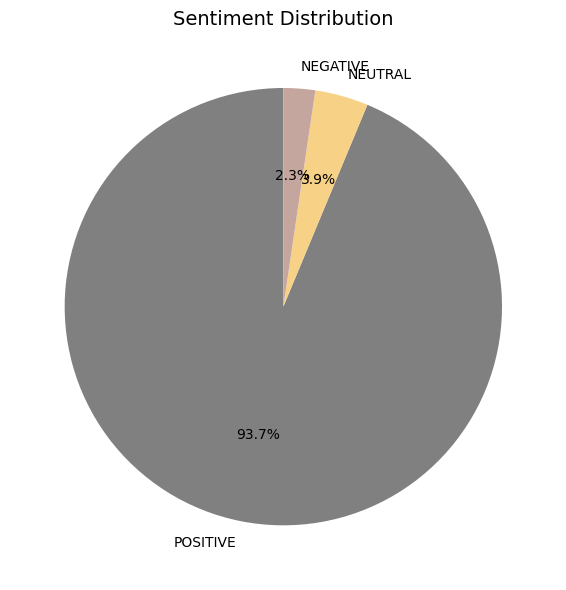

In [17]:
# Define labels and their colors
labels = ['POSITIVE', 'NEUTRAL', 'NEGATIVE']
colors = ['gray', '#F6D186', '#C4A69F']

# Get sentiment counts in the right order
counts = data['sentiment'].value_counts().reindex(labels)

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution', fontsize=14)
plt.tight_layout()

plt.savefig('sentiment_distribution.png', dpi=300)
plt.show()

<ipython-input-18-f9d1da691602>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


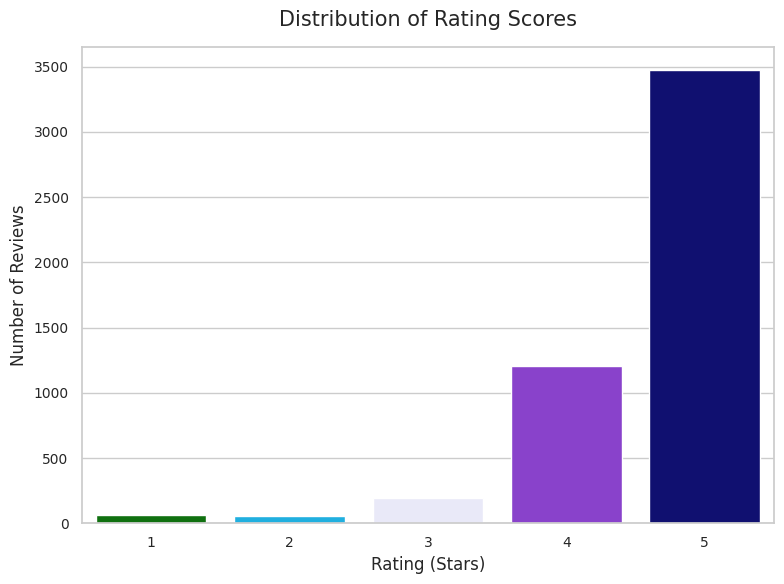

In [18]:
# For 5-star ratings
colors = ['#008000', '#00BFFF', '#E6E6FA', '#8A2BE2', 'navy']  # From 1 to 5

# Set visual style
sns.set(style='whitegrid')

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data,
    x='reviews.rating',
    order=sorted(data['reviews.rating'].unique()),
    palette=colors
)

# Customization
plt.title('Distribution of Rating Scores', fontsize=15, pad=15)
plt.xlabel('Rating (Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('ratings_count_bar_chart.svg', format='svg', dpi=300)
plt.show()


# combine the second dataset to generalize the reviews

In [19]:
# Define path to the chosen file
file_path2 = "/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"

In [20]:
# Load dataset
df2 = pd.read_csv(file_path2)

# Preview
print(df2.shape)
df2.head()

(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [22]:
df2.isnull().sum()

,0
id,0
dateAdded,0
dateUpdated,0
name,0
asins,0
brand,0
categories,0
primaryCategories,0
imageURLs,0
keys,0


In [23]:
data2 = df2[["reviews.text", "reviews.rating"]]

data2.head()

,reviews.text,reviews.rating
0,I order 3 of them and one of the item is bad q...,3
1,Bulk is always the less expensive way to go fo...,4
2,Well they are not Duracell but for the price i...,5
3,Seem to work as well as name brand batteries a...,5
4,These batteries are very long lasting the pric...,5


In [24]:
data2.isnull().sum()

,0
reviews.text,0
reviews.rating,0


In [25]:
 data2['reviews.rating'].value_counts().sort_index(ascending=False)

,count
reviews.rating,
5,19897
4,5648
3,1206
2,616
1,965


In [26]:
# Sentiment score mapping: 1-2 -> 0 (Negative), 3 -> 1 (Neutral), 4-5 -> 2 (Positive)
sentiment_score = {
    1: 0,
    2: 0,
    3: 1,
    4: 2,
    5: 2
}

# Sentiment label mapping
sentiment = {
    0: 'NEGATIVE',
    1: 'NEUTRAL',
    2: 'POSITIVE'
}

# Apply mappings to the dataset
data2['sentiment_score'] = data2['reviews.rating'].map(sentiment_score)
data2['sentiment'] = data2['sentiment_score'].map(sentiment)

# Display the updated data
data2.head()

<ipython-input-26-f4da65619f7a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sentiment_score'] = data2['reviews.rating'].map(sentiment_score)
<ipython-input-26-f4da65619f7a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sentiment'] = data2['sentiment_score'].map(sentiment)


,reviews.text,reviews.rating,sentiment_score,sentiment
0,I order 3 of them and one of the item is bad q...,3,1,NEUTRAL
1,Bulk is always the less expensive way to go fo...,4,2,POSITIVE
2,Well they are not Duracell but for the price i...,5,2,POSITIVE
3,Seem to work as well as name brand batteries a...,5,2,POSITIVE
4,These batteries are very long lasting the pric...,5,2,POSITIVE


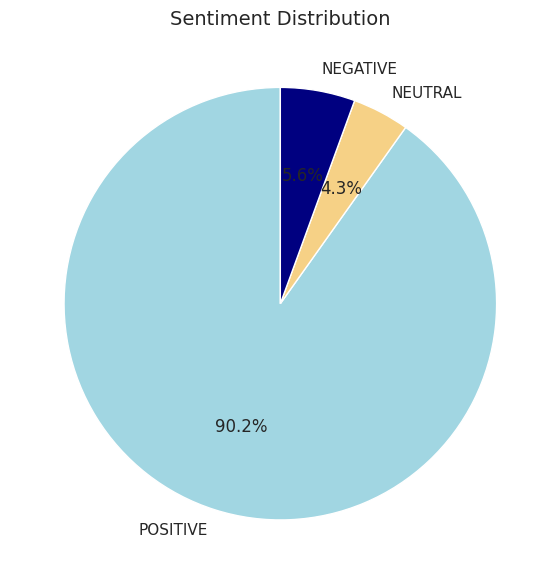

In [27]:
# Define labels and their colors
labels = ['POSITIVE', 'NEUTRAL', 'NEGATIVE']
colors = ['#A1D6E2', '#F6D186', 'navy']

# Get sentiment counts in the right order
counts = data2['sentiment'].value_counts().reindex(labels)

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution', fontsize=14)
plt.tight_layout()

plt.savefig('sentiment_distribution.png', dpi=300)
plt.show()

<ipython-input-28-9366af839e43>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-28-9366af839e43>:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


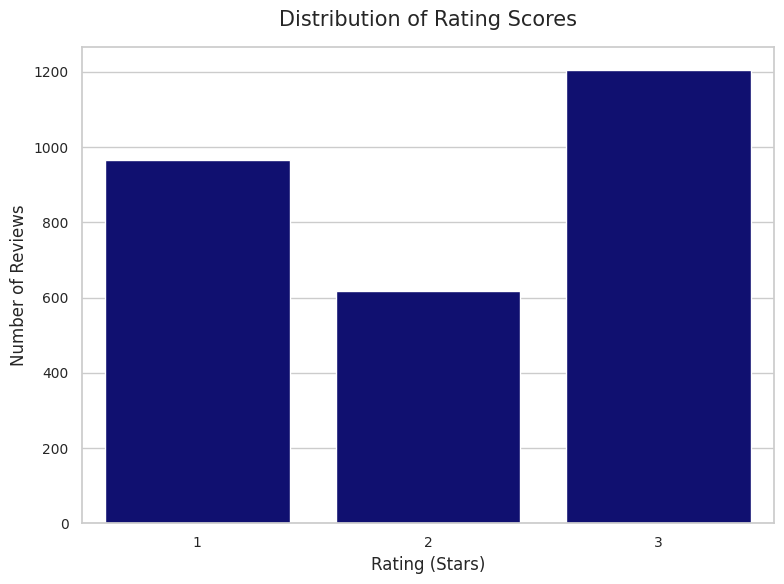

In [28]:
# drop the positive reviews
data2 = data2[data2['sentiment'] != 'POSITIVE']

# Define colors for the ratings
colors = ['navy', 'navy']  # For NEGATIVE and NEUTRAL
# Set visual style
sns.set(style='whitegrid')
# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data2,
    x='reviews.rating',
    order=sorted(data2['reviews.rating'].unique()),
    palette=colors
)
# Customization
plt.title('Distribution of Rating Scores', fontsize=15, pad=15)
plt.xlabel('Rating (Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Adjust layout and save the figure
plt.tight_layout()
plt.show()


In [29]:

data.head()

,reviews.text,reviews.rating,sentiment,sentiment_score
0,I thought it would be as big as small paper bu...,3,NEUTRAL,1
1,This kindle is light and easy to use especiall...,5,POSITIVE,2
2,Didnt know how much i'd use a kindle so went f...,4,POSITIVE,2
3,I am 100 happy with my purchase. I caught it o...,5,POSITIVE,2
4,Solid entry level Kindle. Great for kids. Gift...,5,POSITIVE,2


In [30]:
data2.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
0,I order 3 of them and one of the item is bad q...,3,1,NEUTRAL
8,These do not hold the amount of high power jui...,3,1,NEUTRAL
11,When I first started getting the Amazon basic ...,3,1,NEUTRAL
16,I don't know if I would buy thus brand again s...,1,0,NEGATIVE
17,In my opinion these did not last anywhere near...,2,0,NEGATIVE


In [31]:
# add data2 to data
datamodified = pd.concat([data, data2], ignore_index=True)
data.head()


,reviews.text,reviews.rating,sentiment,sentiment_score
0,I thought it would be as big as small paper bu...,3,NEUTRAL,1
1,This kindle is light and easy to use especiall...,5,POSITIVE,2
2,Didnt know how much i'd use a kindle so went f...,4,POSITIVE,2
3,I am 100 happy with my purchase. I caught it o...,5,POSITIVE,2
4,Solid entry level Kindle. Great for kids. Gift...,5,POSITIVE,2


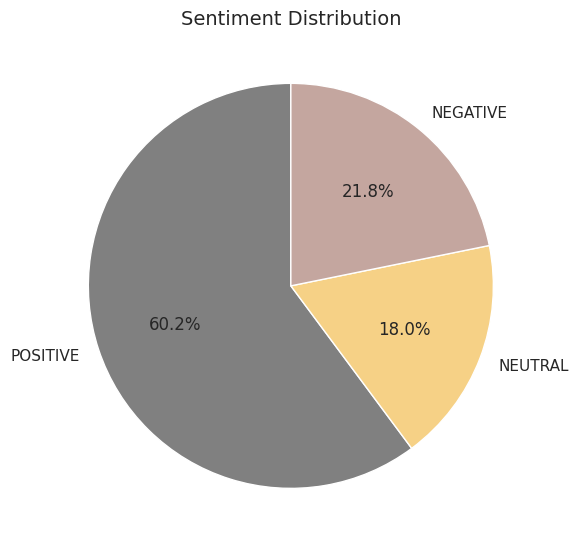

In [32]:
# Define labels and their colors
labels = ['POSITIVE', 'NEUTRAL', 'NEGATIVE']
colors = ['gray', '#F6D186', '#C4A69F']

# Get sentiment counts in the right order
counts = datamodified['sentiment'].value_counts().reindex(labels)

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution', fontsize=14)
plt.tight_layout()

plt.savefig('sentiment_distribution_after_modification.png', dpi=300)
plt.show()

As you can see it's much better than before

*   if you have time try SMOTE (Synthetic Minority Oversampling Technique) or class weight techniques




In [33]:
finaldata = datamodified[['reviews.text', 'sentiment_score']]
finaldata.columns = ['sentence', 'label']
finaldata.to_csv('finaldata.csv', index=False)

The output file “finaldata.csv” will include two columns: “sentence,” which contains the processed text, and “label,” which holds the associated target values.

In [34]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [35]:
from datasets import load_dataset
raw_dataset = load_dataset('csv', data_files = 'finaldata.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [36]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 7787
    })
})

In [37]:
split = raw_dataset['train'].train_test_split(test_size=0.3, seed=42)

In [38]:

split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 5450
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 2337
    })
})

# Tokenisation

In [39]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/902 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


In [40]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification,Trainer, TrainingArguments

tokenizer = AutoTokenizer.from_pretrained("tabularisai/multilingual-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("tabularisai/multilingual-sentiment-analysis")

In [41]:
def tokenize_fn(batch):
  return tokenizer(batch['sentence'], truncation=True)

In [42]:
tokenized_dataset = split.map(tokenize_fn, batched = True)

Map:   0%|          | 0/5450 [00:00<?, ? examples/s]

Map:   0%|          | 0/2337 [00:00<?, ? examples/s]

In [43]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                  save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [44]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc = np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average = 'micro')
  return {'accuracy': acc, 'f1_score': f1}

In [78]:
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

<ipython-input-78-8e78bde985bf>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [46]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 445819622 (445819622-king-khalid-universtiy) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1 Score
1,No log,0.373864,0.861789,0.861789
2,0.402700,0.372865,0.886179,0.886179
3,0.146200,0.440608,0.893025,0.893025


TrainOutput(global_step=1023, training_loss=0.2697528205659033, metrics={'train_runtime': 385.7355, 'train_samples_per_second': 42.387, 'train_steps_per_second': 2.652, 'total_flos': 660542624965440.0, 'train_loss': 0.2697528205659033, 'epoch': 3.0})

In [47]:
! ls training_dir

checkpoint-1023  checkpoint-341  checkpoint-682  runs


In [48]:
from transformers import pipeline

In [49]:
saved_model = pipeline('text-classification',
                       model = 'training_dir/checkpoint-1023')

Device set to use cuda:0


In [50]:

# --- (3) Metrics (Focus on F1 for Minorities) ---
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Per-class F1 and macro-F1
    f1_negative = f1_score(labels, predictions, average=None, labels=[0])[0]  # Negative
    f1_neutral = f1_score(labels, predictions, average=None, labels=[1])[0]    # Neutral
    f1_positive = f1_score(labels, predictions, average=None, labels=[2])[0]    # Positive
    macro_f1 = f1_score(labels, predictions, average="macro")                  # Macro-F1

    return {
        "f1_negative": f1_negative,
        "f1_neutral": f1_neutral,
        "f1_positive": f1_positive,
        "macro_f1": macro_f1,  # Primary metric for model selection
    }
# Update the trainer with the new compute_metrics function before evaluation
trainer.compute_metrics = compute_metrics

print("\nFinal Evaluation:")
results = trainer.evaluate()
print(f"Macro-F1: {results['eval_macro_f1']:.3f}")
print(f"F1 (Negative): {results['eval_f1_negative']:.3f}")
print(f"F1 (Neutral): {results['eval_f1_neutral']:.3f}")
print(f"F1 (Positive): {results['eval_f1_positive']:.3f}")


Final Evaluation:


Macro-F1: 0.852
F1 (Negative): 0.866
F1 (Neutral): 0.740
F1 (Positive): 0.950


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    precision_recall_fscore_support
)



# --- (3) Predict on evaluation set ---
predictions_output = trainer.predict(trainer.eval_dataset)
preds = np.argmax(predictions_output.predictions, axis=1)
true_labels = predictions_output.label_ids


<Figure size 1000x800 with 0 Axes>

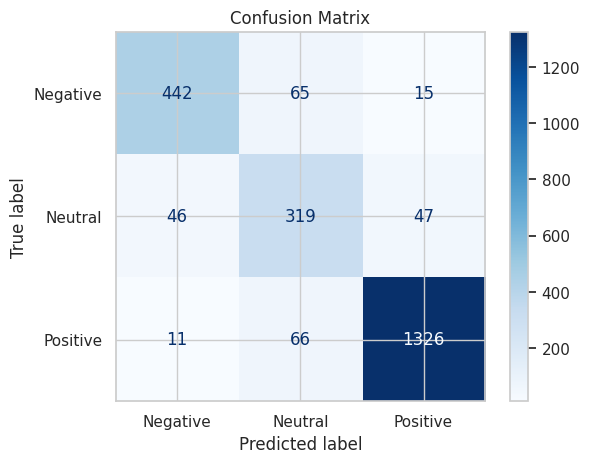

In [80]:

# --- (4) Confusion Matrix ---
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')

plt.show()


Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.85      0.87       522
     Neutral       0.71      0.77      0.74       412
    Positive       0.96      0.95      0.95      1403

    accuracy                           0.89      2337
   macro avg       0.85      0.86      0.85      2337
weighted avg       0.90      0.89      0.89      2337



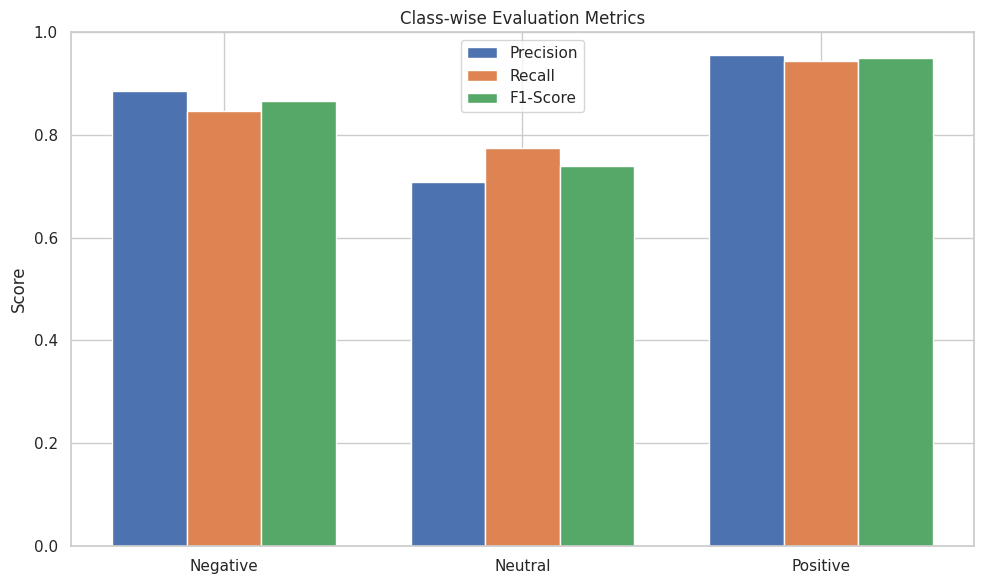

In [81]:


# --- (5) Classification Report ---
report = classification_report(true_labels, preds,
                               target_names=['Negative', 'Neutral', 'Positive'])
print(f"\nClassification Report:\n{report}")

# --- (6) Plot Precision, Recall, F1 for Each Class ---
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, preds, labels=[0, 1, 2])

labels = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1-Score')

plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Class-wise Evaluation Metrics')
plt.legend()
plt.tight_layout()

plt.show()


In [51]:
split['test']

Dataset({
    features: ['sentence', 'label'],
    num_rows: 2337
})

In [52]:
predictions = saved_model(split['test']['sentence'], truncation=True)

In [53]:
predictions[:10]

[{'label': 'Neutral', 'score': 0.9985256791114807},
 {'label': 'Negative', 'score': 0.8586554527282715},
 {'label': 'Neutral', 'score': 0.9986560344696045},
 {'label': 'Neutral', 'score': 0.9986847043037415},
 {'label': 'Neutral', 'score': 0.9977128505706787},
 {'label': 'Neutral', 'score': 0.9985907673835754},
 {'label': 'Negative', 'score': 0.8483819365501404},
 {'label': 'Negative', 'score': 0.9944175481796265},
 {'label': 'Very Negative', 'score': 0.998108983039856},
 {'label': 'Negative', 'score': 0.6547331809997559}]

#Task 2: cluster


In [15]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Load the data
df = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

# Display dataset info
print(f"Dataset shape: {df.shape}")
print("\nSample rows of the dataset:")
print(df.head(2))

Dataset shape: (5000, 24)

Sample rows of the dataset:
                     id             dateAdded           dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs  \
0  https://pisces.bbystatic.com/image2/BestBuy_US...   
1  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                keys  ...  \
0  allnewkindleereaderblack6glarefreetouchscreend

In [16]:
# Extract categories
print("\nExamining the categories column:")
print(df['categories'].head())


Examining the categories column:
0    Computers,Electronics Features,Tablets,Electro...
1    Computers,Electronics Features,Tablets,Electro...
2    Computers,Electronics Features,Tablets,Electro...
3    Computers,Electronics Features,Tablets,Electro...
4    Computers,Electronics Features,Tablets,Electro...
Name: categories, dtype: object


In [17]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [18]:
# Function to clean and extract categories
def extract_categories(category_text):
    if isinstance(category_text, str):
        # Handle different formats (list-like strings, comma-separated)
        if category_text.startswith('[') and category_text.endswith(']'):
            try:
                # Try to parse as literal list
                import ast
                categories = ast.literal_eval(category_text)
                if isinstance(categories, list):
                    return categories
            except:
                pass

        # Handle comma-separated values
        categories = [cat.strip() for cat in re.split(r',|\|', category_text) if cat.strip()]
        return categories
    return []


In [19]:


# Extract and flatten all categories
all_categories = []
for cat in df['categories'].dropna():
    extracted = extract_categories(cat)
    all_categories.extend(extracted)

In [20]:
# If primaryCategories exists, also include those
if 'primaryCategories' in df.columns:
    for cat in df['primaryCategories'].dropna():
        extracted = extract_categories(cat)
        all_categories.extend(extracted)

In [21]:
# Get unique categories and their counts
category_counter = Counter(all_categories)
print(f"\nFound {len(category_counter)} unique categories")
print("\nTop 20 most common categories:")
for cat, count in category_counter.most_common(20):
    print(f"{cat}: {count}")



Found 131 unique categories

Top 20 most common categories:
Electronics: 8629
Computers & Tablets: 3263
Tablets: 3229
All Tablets: 2668
Fire Tablets: 2425
Electronics Features: 2135
iPad & Tablets: 1796
Home Improvement: 1682
Amazon Echo: 1660
Digital Device 3: 1660
Amazon Home: 1660
Amazon: 1535
Home & Tools: 1435
Smart Home Automation: 1435
Smart Hub & Kits: 1435
Hardware: 1435
Amazon Tablets: 1376
Computers: 1347
Computer Accessories: 1211
Speakers: 1070


In [22]:
# Filter categories that appear at least 5 times for meaningful clustering
min_count = 5
filtered_categories = [cat for cat, count in category_counter.items() if count >= min_count]
print(f"\nAfter filtering (min count = {min_count}): {len(filtered_categories)} categories")


After filtering (min count = 5): 119 categories


In [23]:
# Generate embeddings using Sentence-BERT
print("\nGenerating embeddings with Sentence-BERT...")
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(filtered_categories, show_progress_bar=True)


Generating embeddings with Sentence-BERT...


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:

# Apply K-means clustering
num_clusters = 5  #
print(f"\nClustering into {num_clusters} categories...")
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings)



Clustering into 5 categories...


In [25]:
# Create a DataFrame for analysis
cluster_df = pd.DataFrame({
    'category': filtered_categories,
    'cluster': clusters
})


In [26]:
# Analyze clusters
print("\nCluster analysis:")
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id}:")
    cluster_items = cluster_df[cluster_df['cluster'] == cluster_id]['category'].tolist()
    # Print top items from this cluster (sorted by frequency)
    cluster_counts = [(cat, category_counter[cat]) for cat in cluster_items]
    cluster_counts.sort(key=lambda x: x[1], reverse=True)
    for cat, count in cluster_counts[:10]:  # Show top 10 categories in each cluster
        print(f"  {cat}: {count}")


Cluster analysis:

Cluster 0:
  Amazon Echo: 1660
  Amazon Home: 1660
  Amazon: 1535
  Voice Assistants: 1010
  TVs Entertainment: 849
  Movies: 786
  Music: 786
  Frys: 596
  Networking: 590
  Top Rated: 561

Cluster 1:
  Electronics: 8629
  Electronics Features: 2135
  Digital Device 3: 1660
  Hardware: 1435
  Computers: 1347
  Computer Accessories: 1211
  Tech Toys: 786
  Consumer Electronics: 654
  Cases & Bags: 561
  Office Supplies: 265

Cluster 2:
  Computers & Tablets: 3263
  Tablets: 3229
  All Tablets: 2668
  Fire Tablets: 2425
  iPad & Tablets: 1796
  Amazon Tablets: 1376
  Computers/Tablets & Networking: 992
  Tablets & eBook Readers: 934
  Kids' Tablets: 561
  eBook Readers: 432

Cluster 3:
  Home Improvement: 1682
  Home & Tools: 1435
  Smart Home Automation: 1435
  Smart Hub & Kits: 1435
  Smart Home: 1010
  See more Amazon Echo Show Smart Assistant - White: 650
  Voice-Enabled Smart Assistants: 650
  Smart Hubs & Wireless Routers: 225
  Smart Home & Connected Living: 2

In [27]:
# Function to assign a label to each cluster
def label_cluster(cluster_items, counter):
    # Get the top items in this cluster
    top_items = sorted([(cat, counter[cat]) for cat in cluster_items],
                      key=lambda x: x[1], reverse=True)[:15]

    # Simple heuristics for labeling
    keywords = {
        'electronics': ['electronics', 'device', 'electronic', 'tech', 'gadget'],
        'books': ['book', 'ebook', 'kindle', 'reading', 'novel', 'textbook'],
        'accessories': ['accessory', 'accessories', 'case', 'cover', 'stand', 'keyboard', 'charger'],
        'batteries': ['battery', 'batteries', 'power', 'charger', 'charging'],
        'home': ['home', 'kitchen', 'furniture', 'decor', 'household'],
        'non-electronics': ['food', 'coffee', 'pet', 'clothing', 'toy', 'game']
    }

    # Count keyword occurrences
    category_scores = {cat: 0 for cat in keywords}
    for item, _ in top_items:
        item_lower = item.lower()
        for category, kws in keywords.items():
            if any(kw in item_lower for kw in kws):
                category_scores[category] += 1

    # Find best category or assign "Miscellaneous"
    best_category = max(category_scores.items(), key=lambda x: x[1])
    if best_category[1] > 0:
        return best_category[0].title()
    else:
        # Manual inspection of top items
        top_words = ' '.join([item[0].lower() for item in top_items])
        if 'book' in top_words or 'kindle' in top_words or 'ebook' in top_words:
            return 'Books & E-Readers'
        if 'electronics' in top_words or 'device' in top_words:
            return 'Electronics'
        if 'accessory' in top_words or 'case' in top_words or 'cover' in top_words:
            return 'Accessories'
        return 'Miscellaneous'

In [28]:

# Assign labels to clusters
cluster_labels = {}
for cluster_id in range(num_clusters):
    cluster_items = cluster_df[cluster_df['cluster'] == cluster_id]['category'].tolist()
    label = label_cluster(cluster_items, category_counter)
    cluster_labels[cluster_id] = label
    print(f"Cluster {cluster_id} label: {label}")

Cluster 0 label: Home
Cluster 1 label: Electronics
Cluster 2 label: Books
Cluster 3 label: Home
Cluster 4 label: Electronics


In [29]:



# Add labels to the dataframe
cluster_df['cluster_label'] = cluster_df['cluster'].map(cluster_labels)

In [30]:
# Save the clustered categories to CSV
output_path = "clustered_categories.csv"
cluster_df.to_csv(output_path, index=False)
print(f"\n✅ Clustered data saved to: {output_path}")



✅ Clustered data saved to: clustered_categories.csv


In [31]:


# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embeddings)



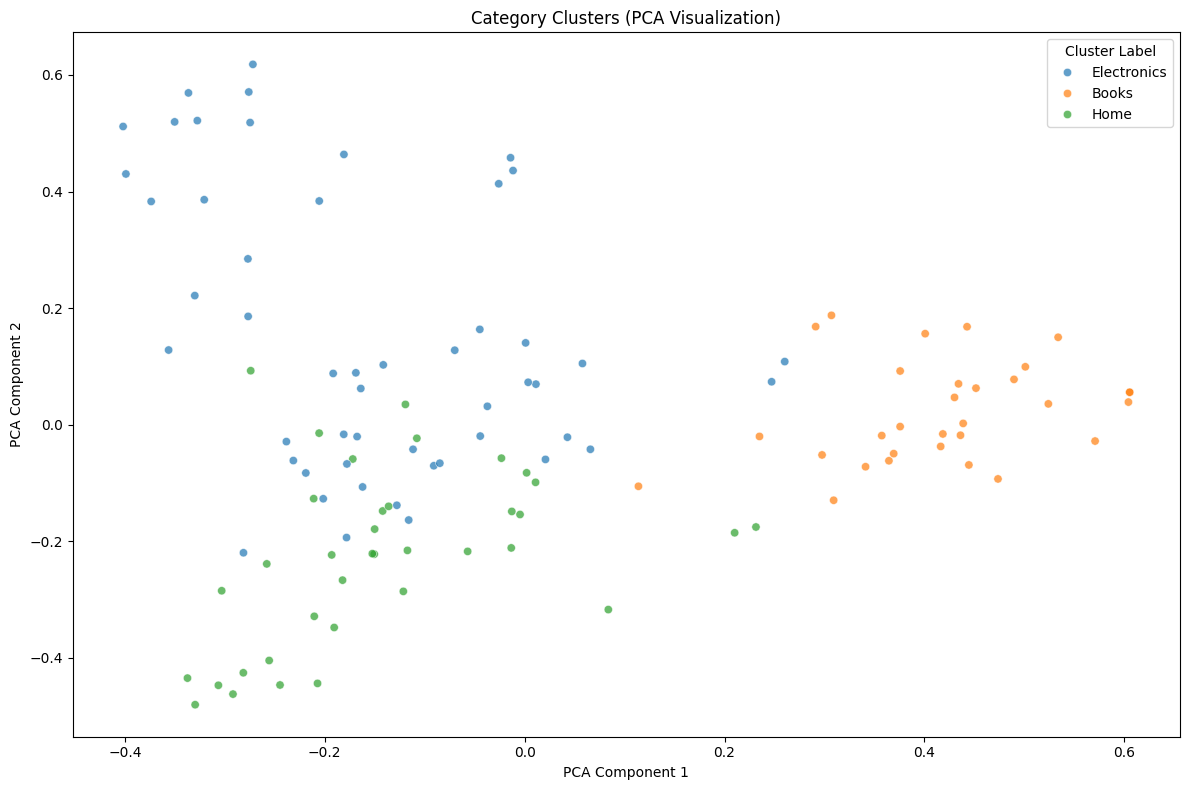

In [32]:
# Create a dataframe for visualization
viz_df = pd.DataFrame({
    'x': reduced_embeddings[:, 0],
    'y': reduced_embeddings[:, 1],
    'category': filtered_categories,
    'cluster': clusters,
    'label': [cluster_labels[c] for c in clusters]
})

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=viz_df, x='x', y='y', hue='label', palette='tab10', alpha=0.7)
plt.title(f'Category Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster Label')
plt.tight_layout()
plt.show()

In [33]:
# Function to map any category to a cluster
def map_category_to_cluster(category, model, kmeans, cluster_labels):
    # Generate embedding
    embedding = model.encode([category])[0].reshape(1, -1)
    # Predict cluster
    cluster = kmeans.predict(embedding)[0]
    # Return label
    return cluster_labels[cluster]

In [34]:
test_categories = [
    "Kindle Paperwhite E-reader",
    "Duracell AA Batteries",
    "Laptop Stand",
    "Nespresso Coffee Pods",
    "USB-C Cable",
    ""
]

print("\nExample classifications:")
for category in test_categories:
    cluster_label = map_category_to_cluster(category, model, kmeans, cluster_labels)
    print(f"{category} -> {cluster_label}")


Example classifications:
Kindle Paperwhite E-reader -> Books
Duracell AA Batteries -> Electronics
Laptop Stand -> Electronics
Nespresso Coffee Pods -> Home
USB-C Cable -> Electronics
 -> Home


In [40]:






# Save the model and cluster information for future use
import pickle
model_data = {
    'sentence_transformer': model,
    'kmeans': kmeans,
    'cluster_labels': cluster_labels
}

# To save the model (uncomment to use)
# with open('category_clustering_model.pkl', 'wb') as f:
#     pickle.dump(model_data, f)

print("\nComplete! You now have a model that clusters product categories into broader meta-categories.")


Complete! You now have a model that clusters product categories into broader meta-categories.


##Task 3. Summarize reviews using generative AI

In [45]:
cluster_df.columns

Index(['category', 'cluster', 'cluster_label'], dtype='object')

In [68]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [71]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [78]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from openai import OpenAI
from google.colab import userdata
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from collections import Counter
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize OpenAI client
api_key = userdata.get('Project')
client = OpenAI(api_key=api_key)

# This list will collect summaries per cluster
cluster_summary_data = []

# Create a mapping for category to cluster label
category_to_cluster_label = dict(zip(cluster_df['category'], cluster_df['cluster_label']))

# Add cluster_label column to data DataFrame
data['cluster_label'] = df['categories'].apply(lambda x: category_to_cluster_label.get(x, 'Miscellaneous') if isinstance(x, str) else 'Miscellaneous')

# Function to clean reviews
def clean_review(review):
    # 1. Lowercase
    review = review.lower()
    # 2. Remove punctuation
    review = re.sub(r'[^\w\s]', '', review)
    # 3. Tokenization
    words = nltk.word_tokenize(review)
    # 4. Remove stop words
    words = [w for w in words if w not in stopwords.words('english')]
    # 5. Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    # 6. Join back to a string
    cleaned_review = ' '.join(words)
    return cleaned_review

# Apply cleaning to the 'reviews.text' column and create 'cleaned_review' column
data['cleaned_review'] = data['reviews.text'].apply(clean_review)

# Loop through each cluster
for cluster_id in cluster_df['cluster'].unique():
    cat_label = cluster_labels[cluster_id]

    # Get products in the current cluster
    cat_df = data[data['cluster_label'] == cat_label]

    print(f"\n--- Cluster {cluster_id} - {cat_label} ---")

    # Step 1: Get top 3 highest-rated products
    top3 = df.groupby('name')['reviews.rating'].mean().sort_values(ascending=False).head(3).reset_index()

    # Step 2: Extract most frequent complaints from negative reviews
    neg_reviews = data[data['sentiment'] == "NEGATIVE"]  # Changed "negative" to "NEGATIVE" for consistency
    neg_reviews = neg_reviews[neg_reviews['cleaned_review'].str.strip().astype(bool)]

    # Include 'name' column in neg_reviews:
    neg_reviews = pd.merge(neg_reviews, df[['id', 'name', 'reviews.text']], left_on='reviews.text', right_on='reviews.text', how='left')
    if not neg_reviews.empty:
        vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
        X = vectorizer.fit_transform(neg_reviews['cleaned_review'])
        word_freq = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))
        sorted_complaints = sorted(word_freq, key=lambda x: x[1], reverse=True)
        complaint_list = [{'word': w, 'freq': int(f)} for w, f in sorted_complaints[:5]]
    else:
        complaint_list = []

    # Step 3: Identify the most negatively-reviewed product
    if not neg_reviews.empty:
        worst_product = neg_reviews.groupby('name')['reviews.rating'].count().sort_values(ascending=False).head(1).reset_index()
    else:
        worst_product = pd.DataFrame([{'name': 'N/A', 'reviews.rating': 0}])


    # Step 4: Create prompt for GPT
    prompt = f"""
Here is a list of the top 3 products in the "{cat_label}" category, including their ratings:
{top3.to_dict(orient='records')}

Most common complaints in negative reviews: {complaint_list}

The most negatively-reviewed product is: {worst_product.to_dict(orient='records')}
"""

    # Step 5: Generate summary from GPT
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}]
    )
    summary = response.choices[0].message.content
    print("\nGPT Summary:\n", summary)

    # Step 6: Store in a list
    cluster_summary_data.append({
        'Cluster ID': cluster_id,
        'Cluster Label': cat_label,
        'Top 3 Products': top3.to_dict(orient='records'),
        'Top Complaints': complaint_list,
        'Worst Product': worst_product.to_dict(orient='records'),
        'GPT Summary': summary
    })

# Step 7: Convert to DataFrame and save as CSV
summary_df = pd.DataFrame(cluster_summary_data)
#summary_df.to_csv('amazon_cluster_summary.csv', index=False)

print("\n✅ All cluster summaries saved to 'amazon_cluster_summary.csv'")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-78-241302b0907b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster_label'] = df['categories'].apply(lambda x: category_to_cluster_label.get(x, 'Miscellaneous') if isinstance(x, str) else 'Miscellaneous')
<ipython-input-78-241302b0907b>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h


--- Cluster 1 - Electronics ---

GPT Summary:
 The top three products in the "Electronics" category are with their ratings are:

1. Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player with a rating of 5.0.
2. Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders with a rating of 4.863636363636363.
3. Kindle Oasis E-reader with Leather Charging Cover - Black, 6" High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers with a rating of 4.82051282051282.

The common complaints in negative reviews are about the tablet, apps, kindle, Amazon, and use, with frequencies of 27, 24, 22, 21, and 19 respectively.

However, the most negatively reviewed product in this category is the Brand New Amazon Kindle Fire 16gb 7" Ips Display Tablet Wifi 16 Gb Blue, with a rating of 34.

--- Cluster 2 - Books ---

GPT Summary:
 The data seems to be partially inaccurate. The products listed in the top 3 for th